In [1]:
from file_utils import *
from dataloader import *
config_name = 'default'
config_data = read_file_in_dir('./config/', config_name + '.json')
vocab, indg_vocab, train_loader, val_loader, test_loader, tr_d, val_d, test_d = get_datasets(
            config_data)


Using the saved vocab.
Using the saved ingredient vocab.


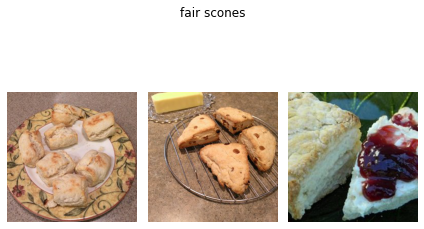

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
title, ingridients, ins, img_paths = test_d.get_raw_data('000df26c65')

f, axes = plt.subplots(1, len(img_paths))
for i, ax in zip(img_paths, axes):
    img = mpimg.imread(i)
    ax.imshow(img)
    
_=[ax.axis('off') for ax in axes]
plt.suptitle(title)
plt.tight_layout()

In [3]:
print('\n'.join(ingridients))

all - purpose flour
white sugar
baking powder
salt
shortening
milk


In [5]:
ins

'preheat an oven to 450 degrees f (230 degrees c). whisk flour, sugar, baking powder, and salt together in a large bowl. cut shortening into flour mixture with a fork or pastry knife until crumbly texture. add milk; mix until just combined. turn dough onto a floured surface; knead until completely mixed, about 1 minute. divide into 2 equal pieces. roll or pat each piece into a 3/4-inch round. cut each round into 4 pieces. arrange pieces on a baking sheet. bake in the preheated oven until golden brown, about 15 minutes.'

In [4]:
print('\n'.join(ins))

p
r
e
h
e
a
t
 
a
n
 
o
v
e
n
 
t
o
 
4
5
0
 
d
e
g
r
e
e
s
 
f
 
(
2
3
0
 
d
e
g
r
e
e
s
 
c
)
.
 
w
h
i
s
k
 
f
l
o
u
r
,
 
s
u
g
a
r
,
 
b
a
k
i
n
g
 
p
o
w
d
e
r
,
 
a
n
d
 
s
a
l
t
 
t
o
g
e
t
h
e
r
 
i
n
 
a
 
l
a
r
g
e
 
b
o
w
l
.
 
c
u
t
 
s
h
o
r
t
e
n
i
n
g
 
i
n
t
o
 
f
l
o
u
r
 
m
i
x
t
u
r
e
 
w
i
t
h
 
a
 
f
o
r
k
 
o
r
 
p
a
s
t
r
y
 
k
n
i
f
e
 
u
n
t
i
l
 
c
r
u
m
b
l
y
 
t
e
x
t
u
r
e
.
 
a
d
d
 
m
i
l
k
;
 
m
i
x
 
u
n
t
i
l
 
j
u
s
t
 
c
o
m
b
i
n
e
d
.
 
t
u
r
n
 
d
o
u
g
h
 
o
n
t
o
 
a
 
f
l
o
u
r
e
d
 
s
u
r
f
a
c
e
;
 
k
n
e
a
d
 
u
n
t
i
l
 
c
o
m
p
l
e
t
e
l
y
 
m
i
x
e
d
,
 
a
b
o
u
t
 
1
 
m
i
n
u
t
e
.
 
d
i
v
i
d
e
 
i
n
t
o
 
2
 
e
q
u
a
l
 
p
i
e
c
e
s
.
 
r
o
l
l
 
o
r
 
p
a
t
 
e
a
c
h
 
p
i
e
c
e
 
i
n
t
o
 
a
 
3
/
4
-
i
n
c
h
 
r
o
u
n
d
.
 
c
u
t
 
e
a
c
h
 
r
o
u
n
d
 
i
n
t
o
 
4
 
p
i
e
c
e
s
.
 
a
r
r
a
n
g
e
 
p
i
e
c
e
s
 
o
n
 
a
 
b
a
k
i
n
g
 
s
h
e
e
t
.
 
b
a
k
e
 
i
n
 
t
h
e
 
p
r
e
h
e
a
t
e
d
 
o
v
e
n
 
u
n
t
i
l
 
g
o
l
d
e
n
 
b


In [ ]:
# modelHandler.return_example should wrap around this but is untested for now